In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

### Random walk with drift

In [2]:
def random_walk(n_steps,P_h):
    pos = [0]
    for step in range(n_steps-1):
        if np.random.random() < P_h:
            pos.append(pos[-1]+1)
        else:
            pos.append(pos[-1]-1)
    return pos

n_steps = 30
P_h = 0.6
n_walks = 200

sample_walk = random_walk(n_steps,P_h)
mega_walk = []
for walk in range(n_walks):
    mega_walk.append(random_walk(n_steps,P_h)[-1])

mean_exp = (0.6-0.4)*30
mean_smp = np.mean(mega_walk)
var_exp = np.average(np.square(mega_walk))-np.square(mean_exp)
var_smp = np.var(mega_walk)

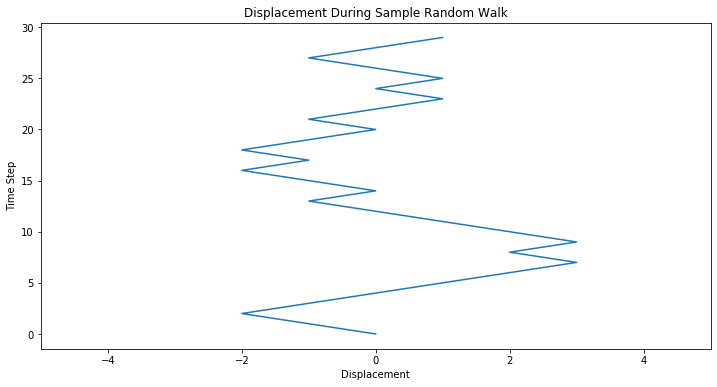

In [4]:
plt.figure(figsize=(12,6))

plt.title("Displacement During Sample Random Walk")
plt.xlabel("Displacement")
plt.ylabel("Time Step")
plt.plot(sample_walk,range(n_steps))
plt.xlim(-5,5)
plt.show()

/Users/rebeccamqamelo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


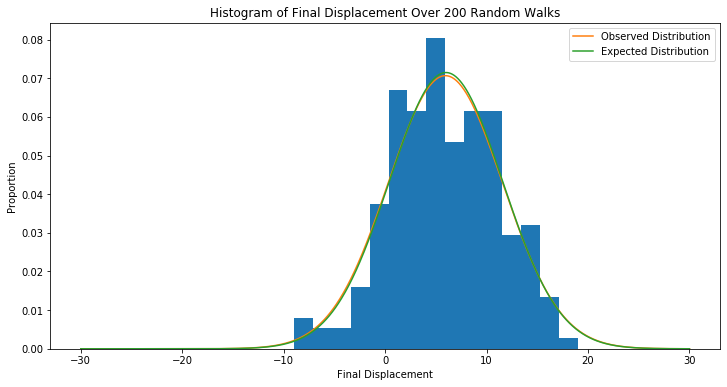

Expected Mean:     5.999999999999998
Sample Mean:       5.94

Expected Variance: 31.160000000000018
Sample Variance:   31.8764


In [6]:
plt.figure(figsize=(12,6))
plt.title("Histogram of Final Displacement Over 200 Random Walks")
plt.xlabel("Final Displacement")
plt.ylabel("Proportion")
plt.hist(mega_walk,bins=15,normed=True)
gaussian_x = np.linspace(-30,30,1000)
gaussian_y = np.multiply(norm.pdf(gaussian_x, mean_smp, np.sqrt(var_smp)),1)
expected_y = np.multiply(norm.pdf(gaussian_x, mean_exp, np.sqrt(var_exp)),1)
plt.plot(gaussian_x, gaussian_y, label="Observed Distribution")
plt.plot(gaussian_x,expected_y, label="Expected Distribution")
plt.legend()

plt.show()

print("Expected Mean:     " + str(mean_exp))
print("Sample Mean:       " + str(mean_smp))
print("")
print("Expected Variance: " + str(var_exp))
print("Sample Variance:   " + str(var_smp))

### Gambler's ruin with limits

In [8]:
initial_fortune = 100
bank = 2000
iterations = np.logspace(1,4,10)

means = []
variances = []
for i in iterations:
    results=[]
    for trial in range(np.int(i)):
        steps_survived=0
        fortune=initial_fortune
        while 0<fortune<(initial_fortune+bank):
            if np.random.random() < 0.5:
                fortune+=1
            else:
                fortune-=1
            steps_survived+=1
        results.append(steps_survived)
    means.append(np.mean(results))
    variances.append(np.var(results))

In [ ]:

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Mean Steps Over Number of Iterations")
plt.semilogx(iterations,means)
plt.subplot(1,2,2)
plt.title("Step Variance Over Number of Iterations")
plt.semilogx(iterations,variances)
plt.show()